In [ ]:
# 
# Pick any dataset from the previous chapters – either a hands-on example or a 
# practice problem – that contains at least 10 features. Run through a feature 
# selection exploration using  any of the methods that we have seen. Report your 
# findings.  Now, run your original analysis (regression, classification, 
# clustering) with the new  dataset containing fewer features. Compare the original 
# outcomes with the ones you get  now. How close or different are they? 
# 

In [8]:
import pandas as pd
import numpy as np
import pandas.api.types as pdtypes  

# Load and format the dataset
class_names = {1: 'Low', 2: 'Medium', 3: 'High'}
colnames = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
            'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
            'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df = pd.read_csv('../Datasets/Code_and_Data_(Chapter_07)/Code and Data (Chapter 07)/wine.data', names=colnames)

# Select feature set and target variable
X = df.drop(columns='Class')
y = df.Class

# Inspect shape of X to see it currently has 13 features
print(f"\nShape of X: {X.shape} \n")


Shape of X: (178, 13) 



In [9]:
############################################################################
#                                                                          #
#                            Using SelectKBest                             #
#                                                                          #
############################################################################

from sklearn.feature_selection import SelectKBest, f_regression 

# Initialize SelectKBest with the k_regression test as the scoring function
# and set 'k' to 5 to select the 5 best features
selector = SelectKBest(f_regression, k=5)

# Apply the SelectKBest object to the feature matrix and target vector
# to select the top 5 features and transform the dataset
X_new = selector.fit_transform(X, y)

# Show the dimensions of the feature matrix after feature selection
print(f"\nNew shape of X: {X_new.shape}") 

# Now to determine which features were selected, we can utilizle 
# the .get_support() function of SelectKBest model.

# Get boolean mask of selected features e.g. [True, False, True, False, False, True, False, False, False, True]
selected_features_mask = selector.get_support()

# Get actual original feature names
original_features = X.columns 

# Print the names of the selected features, I will call it sf for selected_features
sf = original_features[selected_features_mask]
print(f"\nSelected Features: {sf[0]}, {sf[1]}, {sf[2]}, {sf[3]}, {sf[4]}\n")


New shape of X: (178, 5)

Selected Features: Total phenols, Flavanoids, Hue, OD280/OD315 of diluted wines, Proline



In [10]:
############################################################################
#                                                                          #
#                         Using VarianceThreshold                          #
#                                                                          #
############################################################################

from sklearn.feature_selection import VarianceThreshold  

# Instantiate the VarianceThreshold object 'sel' with a threshold of 0.2.
sel = VarianceThreshold(threshold=0.2)  

# Apply the VarianceThreshold to the dataset 'X' using the 'fit_transform' method. 
# This method first fits the variance threshold model to the data and then transforms 
# the data by removing features that don't meet the threshold. The result is stored in 'X_new'.
X_new = sel.fit_transform(X)  

# Print the shape of dataset 'X_new'
print(f"\nNew shape of X: {X_new.shape}")

# Get boolean mask of selected features e.g. [True, False, True, False, False, True, False, False, False, True]
selected_features_mask = sel.get_support()

# Print the names of the selected features, I will call it sf for selected_features
sf = original_features[selected_features_mask]
for i in range(len(sf)):
    print(f"\nSelected Feature {i+1}: {sf[i]}", end=" ")
print ("\n")


New shape of X: (178, 10)

Selected Feature 1: Alcohol 
Selected Feature 2: Malic acid 
Selected Feature 3: Alcalinity of ash 
Selected Feature 4: Magnesium 
Selected Feature 5: Total phenols 
Selected Feature 6: Flavanoids 
Selected Feature 7: Proanthocyanins 
Selected Feature 8: Color intensity 
Selected Feature 9: OD280/OD315 of diluted wines 
Selected Feature 10: Proline 



                     Feature  Importance
                  Flavanoids    0.248349
OD280/OD315 of diluted wines    0.220169
                     Proline    0.184423
               Total phenols    0.086301
                         Hue    0.071287
                     Alcohol    0.060253
             Color intensity    0.059611
                  Malic acid    0.018920
                   Magnesium    0.015938
           Alcalinity of ash    0.015481
             Proanthocyanins    0.007912
        Nonflavanoid phenols    0.006807
                         Ash    0.004550


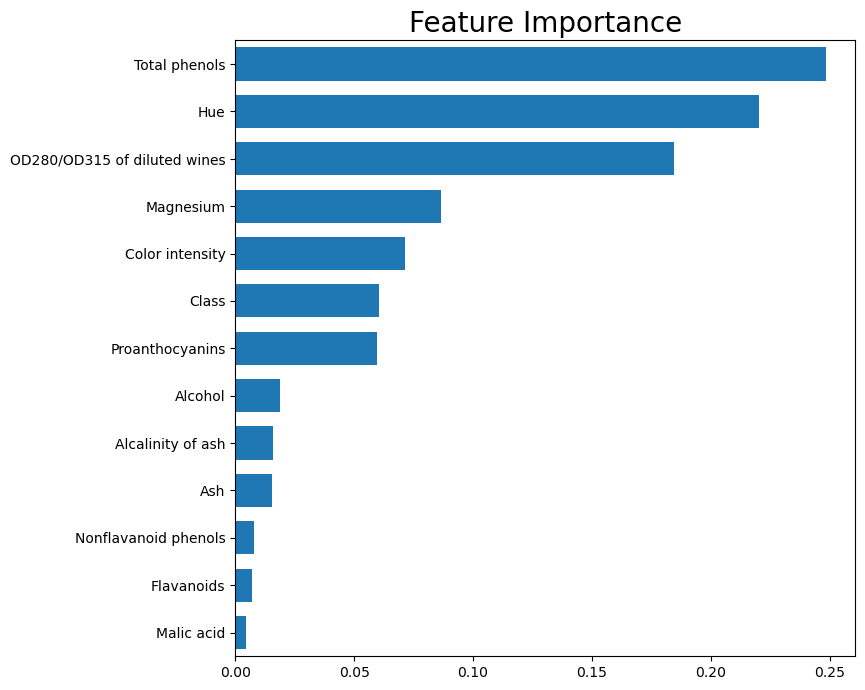

In [12]:
############################################################################
#                                                                          #
#                        Using ExtraTreesRegressor                         #
#                                                                          #
############################################################################

from sklearn.ensemble import ExtraTreesRegressor 
import matplotlib.pyplot as plt

# Create an ExtraTreesRegressor object. 
# 'n_estimators=100' specifies that 100 trees should be grown in this forest
# 'random_state=42' makes the randomness deterministic, allowing for reproducible results each time the code is run.
reg = ExtraTreesRegressor(n_estimators=100, random_state=42)

# Train the regressor. 
reg = reg.fit(X, y)

# Output the feature importances.
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': reg.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df.to_string(index=False))

# Sort the feature importances in ascending order and get the indices
tree_importance_sorted_idx = np.argsort(reg.feature_importances_)

# Create array of indices as float values which are offset by 0.5 to center align the labels
tree_indices = np.arange(0, len(reg.feature_importances_)) + 0.5

# Create a horizontal bar chart where the bar heights are the feature importances
# and use the sorted indices to order the bars. 
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(1,1,1)
ax1.barh(tree_indices, reg.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(df.columns[tree_importance_sorted_idx])
ax1.set_ylim((0, len(reg.feature_importances_)))
ax1.set_title('Feature Importance', fontsize = 20)
plt.show()

In [13]:
############################################################################
#                                                                          #
#                          Using SelectFromModel                           #
#                                                                          #
############################################################################

# Import the 'SelectFromModel' class from the 'feature_selection' module of the 'sklearn' library.
# This class is used to select features based on the importance weights of another model.
from sklearn.feature_selection import SelectFromModel

# prefit = True indicates we have already fit the "reg" model.
model = SelectFromModel(reg, prefit=True)

# Transform the feature matrix 'X' using the initialized 'SelectFromModel' instance.
# The result is a new feature matrix 'X_new' that contains only the selected features.
X_new = model.transform(X)

# Show the dimensions after selection
print(f"\nNew shape of X: {X_new.shape}\n")

# Get indices of selected features for printing
selected_feature_indices = model.get_support(indices=True)
selected_features = ", ".join(X.columns[selected_feature_indices])
print(f"Features selected: {selected_features}\n")


New shape of X: (178, 4)

Features selected: Total phenols, Flavanoids, OD280/OD315 of diluted wines, Proline



C:\Users\laesc\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
